In [34]:
pip install ipympl

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 7.0 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


# Revisão de geometria


Tivemos uma revisão de Geometria na Aula 2 motivada pela necessidade de definir algumas ferramentas essenciais para descrever o movimento de objetos.

- **Espaço Euclidiano**: um espaço desprovido de matéria (vácuo), homogêneo e isotrópico. Neste espaço, definimos pontos, vetores, curvas e superfícies.
- **Referenciais**: definidos através de uma origem $\mathbf{O}$, a partir da qual as posições serão medidas, e versores $\displaystyle \hat{e_i}$.
- **Vetores**: indicam as coordenadas do objeto em um dado referencial, bem como dão informação sobre sua direção e sentido neste referencial.


## Exemplo: sistema de coordenadas cartesiano em 3D

Tomemos como $\vec{q}(t)$ o vetor que define a posição instantânea de uma partícula qualquer movimentando-se em 3 dimensões. Os versores que definem o espaço são $\hat{i}, \hat{j}, \hat{k}$ mutumente ortonormais e a origem é marcada como $\vec{O} = (0,0,0)$. E podemos escrever


$$\vec{q}(t) = x(t)\hat{i} +  y(t) \hat{j} + z(t) \hat{k},$$

ou
$$\vec{q}(t) = (x(t), y(t), z(t)).$$



Ok, Vamos desenhar! No python, a função que permite desenhar vetores é a ```quiver```.

Farei uma função para desenhar o referencial.

In [35]:
# importando as bibliotecas úteis
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib ipympl

In [37]:
from google.colab import output
output.enable_custom_widget_manager()

In [135]:
def desenha_referencial(tamanho_eixo=5, elev=24, azimut=33, d_eixo=0.125):

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  ax.view_init(azimut,elev)


  # eixos
  ax.quiver(0, 0, 0, tamanho_eixo, 0, 0, color='k', arrow_length_ratio=0.1, lw=1)
  ax.text(tamanho_eixo + d_eixo, -2*d_eixo, 0, 'X', color='k')

  ax.quiver(0, 0, 0, 0, tamanho_eixo, 0, color='k', arrow_length_ratio=0.1, lw=1)
  ax.text(0, tamanho_eixo + d_eixo, 0, 'Y', color='k')

  ax.quiver(0, 0, 0, 0, 0, tamanho_eixo, color='k', arrow_length_ratio=0.1, lw=1)
  ax.text(0, 0, tamanho_eixo + d_eixo, 'Z', color='k')

  # origem
  ax.text(0,0,0, 'O', color='k', va='bottom', ha='right')
  ax.scatter(0,0,0, color='k', marker='o', s=10)


  ax.set_xlim(-1,5)
  ax.set_ylim(-1,5)
  ax.set_zlim(-1,5)

  # modificando o plot para ficar transparente
  ax.xaxis.pane.fill = False
  ax.yaxis.pane.fill = False
  ax.zaxis.pane.fill = False
  ax.grid(False)

  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_zticks([])

  ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
  ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
  ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

  ax.xaxis.pane.set_edgecolor('none')
  ax.yaxis.pane.set_edgecolor('none')
  ax.zaxis.pane.set_edgecolor('none')

  return fig, ax

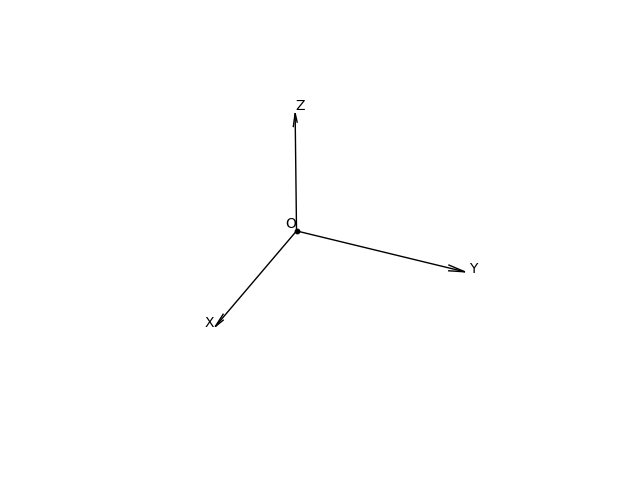

In [136]:
# desenhando o referencial
fig, ax = desenha_referencial()

Agora, vamos desenhar 2 vetores

$\vec{R_1} = (1,2,0)$

e

$\vec{R_2} = (1,1,0)$

Bem como os vetores diferença e soma

$\vec{A} = \vec{R_1} - \vec{R_2}$

$\vec{B} = \vec{R_1} + \vec{R_2}$-

Support for third party widgets will remain active for the duration of the session. To disable support:

In [113]:
R_1 = np.array([1,2,0])
R_2 = np.array([1,1,0])
A = R_1 - R_2
B = R_1 + R_2

In [131]:
def desenha_vetor_3D_no_eixo(R, ax, texto='', textoLRTB = np.array([1,1,1]), **kwargs):
    """
    Desenha um vetor no referencial

    Parâmetros:
    - ax: o eixo do referencial
    - R: posição do final do vetor
    - texto: texto para identificação do vetor
    - textoLRTB: + ou - significa se o texto vai estar à esquerda, direita, cima ou baixo.
    - **kwargs: Additional keyword arguments for quiver and text functions.
    """
    ax.quiver(0, 0, 0, R[0],R[1],R[2], arrow_length_ratio=0.15, linewidth=2., **kwargs)
    ha = 'right'
    va = 'bottom'
    if(textoLRTB[1] == -1):
      ha = 'left'
    if(textoLRTB[2] == -1):
      va = 'top'
    ax.text(R[0]/2,R[1]/2,R[2]/2 , texto, ha = ha, va = va, **kwargs)


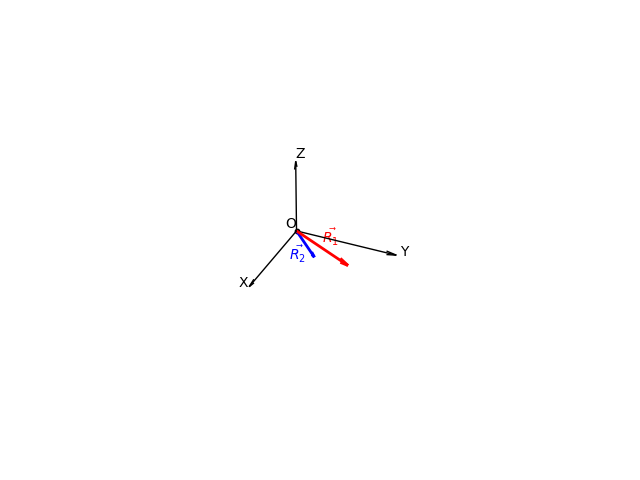

In [138]:
fig, ax = desenha_referencial(tamanho_eixo=3)

desenha_vetor_3D_no_eixo(R_1, ax,  r'$\vec{R_1}$', textoLRTB=np.array([1,-1,1]), color='r')
desenha_vetor_3D_no_eixo(R_2, ax, r'$\vec{R_2}$', textoLRTB=np.array([1,1,-1]),color='b')

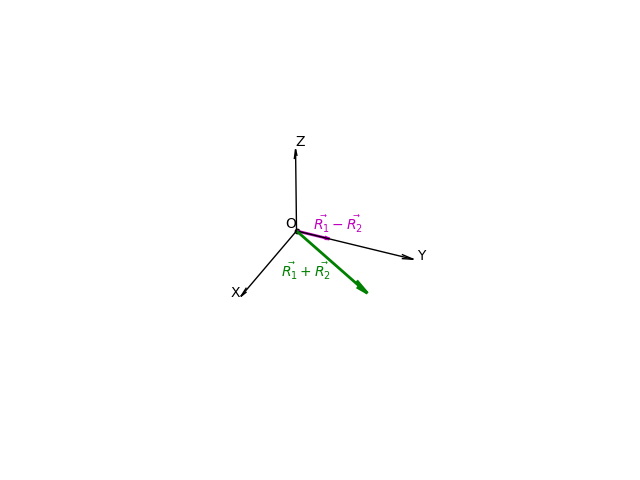

In [139]:
fig2, ax2 = desenha_referencial(tamanho_eixo=3.5)

desenha_vetor_3D_no_eixo(R_1 + R_2, ax2,  r'$\vec{R_1} + \vec{R_2}$', textoLRTB=np.array([1,1,-1]), color='g')
desenha_vetor_3D_no_eixo(R_1 - R_2, ax2, r'$\vec{R_1} - \vec{R_2}$', textoLRTB=np.array([1,-1,1]),color='m')

In [114]:
A

array([0, 1, 0])

# Vetores

Algumas propriedades de vetores.

Seja $\displaystyle \vec{R} = \sum_i R_i \hat{e}_i$ um vetor definido em um espaço com versores $\hat{e}_i$. Cada componente $R_i$ é associada ao versor. Exemplo: em coordenadas cartesianas $\hat{e}_1 = \hat{i}$ , $\hat{e}_2 = \hat{j}$ e $\hat{e}_3 = \hat{k}$, tal que $\vec{R} = R_x \hat{i} + R_y \hat{j} + R_z \hat{k}$.

## Módulo ou norma
Comprimento do vetor. Definido como
$R \equiv || \vec{R} || = \sqrt{\displaystyle \sum_{i} R_i^2}$.

## Produto escalar
Projeção de um vetor no outro. Definido como  
$$ \vec{A} . \vec{B} = \sum_{i} A_i B_i.$$

Ângulo entre eles:
$$ \vec{A} . \vec{B} = A B \cos{\theta_{AB}}.$$

### Métrica
Generalizando para a métrica definida por uma matriz $g$ de produtos escalares de versores $g_{ij} = \hat{e}_i . \hat{e}_j$. Esta definição é útil quando os eixos não são ortogonais! Definido como

$$ \vec{A} . \vec{B} = \sum_{ij} A_i g_{ij} B_j.$$


Vejamos isto no numpy!

In [141]:
# norma do vetor com a função norm
np.linalg.norm(R_1)

2.23606797749979

In [143]:
# norma do vetor com produto escalar
np.sqrt(np.dot(R_1,R_1))

2.23606797749979

In [145]:
# outra forma de fazer o dot
np.sqrt(R_1.T @ R_1)

2.23606797749979

In [159]:
# ângulo entre os vetores (em radianos)
angulo = np.arccos(np.clip(np.dot(R_1,R_2)/np.linalg.norm(R_1)/np.linalg.norm(R_2) , -1, 1))
print('angulo:', angulo, ' ou em graus:', angulo/np.pi*180)


angulo: 0.3217505543966423  ou em graus: 18.434948822922017


In [161]:
# exemplo de métrica
g = np.eye(3)
g[0,1] = 0.5
g[1,0] = 0.5
g

array([[1. , 0.5, 0. ],
       [0.5, 1. , 0. ],
       [0. , 0. , 1. ]])

In [163]:
# produto escalar na métrica cartesiana
R_1.T @ np.eye(3) @ R_2

3.0

In [164]:
# produto escalar com métrica nova
R_1.T @ g @ R_2

4.5

## Produto vetorial

Vetor simultaneamente ortogonal a dois vetores de entrada:

$$ \vec{C} = \vec{A} \times \vec{B}.$$

O módulo é proporcional à área do paralelogramo definido pelos vetores de entrada:

$$C = A B \sin{\theta_{AB}}.$$

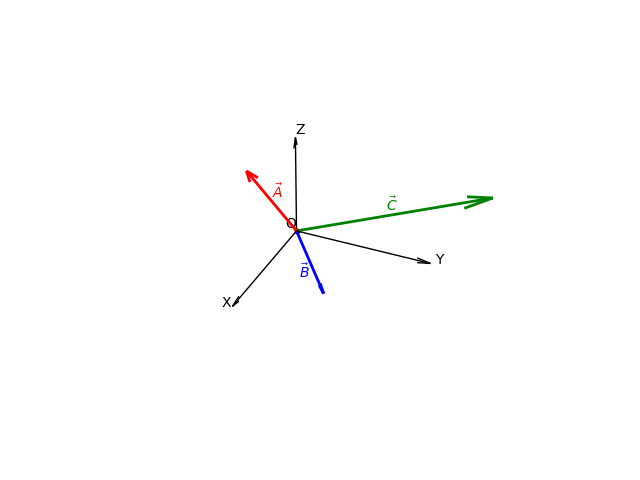

In [215]:
A = np.array([1,-1,3])
B = np.array([1.5,1.5,-1])

C = np.cross(U, V)

fig, ax = desenha_referencial(tamanho_eixo=4)

desenha_vetor_3D_no_eixo(A, ax,  r'$\vec{A}$', textoLRTB=np.array([1,-1,1]), color='r')
desenha_vetor_3D_no_eixo(B, ax, r'$\vec{B}$', textoLRTB=np.array([1,1,-1]),color='b')
desenha_vetor_3D_no_eixo(C, ax, r'$\vec{C}$', textoLRTB=np.array([1,1,1]),color='g')


In [ ]:
from google.colab import output
output.disable_custom_widget_manager()